공공데이터포털의 [전국도서관표준데이터](https://www.data.go.kr/dataset/15013109/standard.do) 일부를 실습용으로 가공하였습니다.

# 사전 준비

In [1]:
# 나눔글꼴 설치
!apt install fonts-nanum

# Plotnine 패키지 설치
!pip install plotnine

# 기본 글꼴 변경
import matplotlib as mpl
mpl.font_manager._rebuild()
mpl.pyplot.rc('font', family='NanumBarunGothic')

# 레티나 디스플레이 지원
%config InlineBackend.figure_format = 'retina'

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 0 not upgraded.
Need to get 9,129 kB of archives.
After this operation, 27.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu artful/main amd64 fonts-nanum all 20161025-1 [9,129 kB]
Fetched 9,129 kB in 1s (8,479 kB/s)

78Selecting previously unselected package fonts-nanum.
(Reading database ... 18396 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20161025-1_all.deb ...
7Progress: [  0%] [..........................................................] 87Progress: [ 16%] [#########.................................................] 8Unpacking fonts-nanum (20161025-1) ...
7Progress: [ 33%] [###################.......................................] 87Progress: [ 50%] [#############################........................

    Uninstalling scipy-0.19.1:
      Successfully uninstalled scipy-0.19.1


데이터 읽어오기.

In [2]:
import pandas as pd
import numpy as np
from plotnine import *

src = pd.read_csv('https://s3.ap-northeast-2.amazonaws.com/data10902/messy/library.csv')

/usr/local/lib/python3.6/dist-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


데이터 복사본 만들기. 중간에 데이터가 망가지면 이 셀부터 다시 실행하면 됩니다 :)

In [45]:
df = src.copy()
print(df.shape)

(1171, 9)


# 데이터 살펴보기

시도별 도서관 수는?

In [0]:
# true : dataframe, false : series
# 시도별로 도서관 수 찾기
df2 = df['도서관명'].str.extract(r'\(([^)]+)\)$', expand=False).value_counts()
# df2.plot.barh(color='steelblue')

# df2['일요휴관일'] = df['휴관일'].str.extract(r'([.]+[\s\.\,]일.+)')
# print(df2['일요휴관일'])
# for x in set(df['휴관일']):
#   print(x)

소장자료수(도서, 연속간행물, 비도서를 모두 합한 값)가 가장 많은 도서관은?

In [68]:
df['자료수'] = (df['도서']+df['연속간행물']+df['비도서']).astype(int)
df.sort_values(by="자료수",ascending = False)
df.tail(30)

,key,도서관명,전화번호,위경도,좌석수,도서,연속간행물,비도서,휴관일,위도,경도,시도,자료수
1141,1141,가야1동가얏골미니도서관(부산광역시),051-605-6822,"35.153249,129.034301",8,1353,0,0,"매주 토요일·일요일, 국가지정공휴일",35.153248,129.034302,부산광역시,1353
1142,1142,솔로몬도서관(울산광역시),052-285-0583,"35.558417,129.332127",18,1300,1,0,매주월요일,35.558418,129.332123,울산광역시,1301
1143,1143,우정혁신LH2차책사랑(울산광역시),052-242-9800,"35.568791,129.332134",12,1300,0,0,"매주토, 일요일",35.568790,129.332138,울산광역시,1300
1144,1144,작은여울 도서관(부산광역시),051-636-0086,"35.146423,129.078022",10,1300,2,1,매주 일요일,35.146423,129.078018,부산광역시,1303
1145,1145,중원아사모(경기도),031-729-4631,"37.438562,127.166340",20,1300,0,0,"매주 일요일, 국가지정공휴일",37.438560,127.166344,경기도,1300
1146,1146,리빙스턴 작은도서관(부산광역시),051-413-1101,"35.089001,129.028900",18,1255,0,0,"토, 일, 공휴일",35.089001,129.028900,부산광역시,1255
1147,1147,에뜰3차아름도서관(울산광역시),052-211-1931,"35.568791,129.332134",20,1215,0,23,"매주토, 일요일",35.568790,129.332138,울산광역시,1238
1148,1148,능주면민도서관(전라남도),061-372-2445,"34.989068,126.957558",36,1209,0,0,"매주 월요일, 법정공휴일",34.989067,126.957558,전라남도,1209
1149,1149,카르페디엠(경기도),070-8612-2792,"37.413598,127.130798",17,1200,0,0,"매주 주말, 국가지정공휴일",37.413597,127.130798,경기도,1200
1150,1150,해망마을도서관(전라남도),061-373-9937,"34.964382,126.888973",30,1200,0,0,매주 일요일,34.964382,126.888969,전라남도,1200


일요일에 쉬는 도서관은?

In [65]:
pattern = r'일요일|주말|[\b\s,]일[\b\s,]'

# a = set(df['휴관일'])
# b = set(df['휴관일'][df['휴관일'].str.contains(pattern)])
# print(a - b)

df.loc[df['휴관일'].str.contains(pattern)][['도서관명','휴관일']]

,도서관명,휴관일
30,유원대학교 도서관(충청북도),토요일+일요일+공휴일
82,삼례분관(전라북도),"일요일, 법정공휴일"
187,중리초등복합시설도서관(경상남도),매주 일요일
189,고산분관(전라북도),"일요일, 법정공휴일"
193,완주군립중앙(전라북도),"일요일, 법정공휴일"
201,전북도청도서관(전라북도),"토,일,공휴일"
247,구갈희망누리도서관(경기도),매주 일요일
248,둔산영어도서관(전라북도),"일요일, 법정공휴일"
250,대구시청작은도서관(대구광역시),"토,일,공휴일"
254,당정문화도서관(경기도),"토,일,공휴일"


# 데이터 다듬기

"위도"와 "경도" 분리하기.

In [66]:
df.head()
df['위도'] = df['위경도'].str.extract(r'(.+)\,').astype(np.float32)
df['경도'] = df['위경도'].str.extract(r'\,(.+)').astype(np.float32)
# result = df['위경도'].str.split(',',1).tolist(),columns = ['위도','경도'])
# result
print(df['위도'])
print(df['경도'])

0       36.309677
1       37.160015
2       35.233150
3       37.773106
4       37.467854
5       37.446636
6       35.224308
7       35.535877
8       37.410561
9       37.411602
10      36.053654
11      37.386196
12      35.809021
13      35.808704
14      37.304550
15      35.213032
16      37.155109
17      36.788258
18      35.528206
19      37.559097
20      36.612476
21      37.361477
22      37.351543
23      35.272724
24      35.558441
25      37.396057
26      35.829132
27      37.465298
28      35.940411
29      37.286743
          ...    
1141    35.153248
1142    35.558418
1143    35.568790
1144    35.146423
1145    37.438560
1146    35.089001
1147    35.568790
1148    34.989067
1149    37.413597
1150    34.964382
1151    35.931229
1152    37.467327
1153    36.316093
1154    35.251972
1155    34.982819
1156    35.308121
1157    35.079094
1158    35.891384
1159    35.612366
1160    36.339577
1161    37.443684
1162    37.351276
1163    37.457581
1164    35.123566
1165    35

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  This is separate from the ipykernel package so we can avoid doing imports until


(잠깐 재미로) 지도 그려보기.

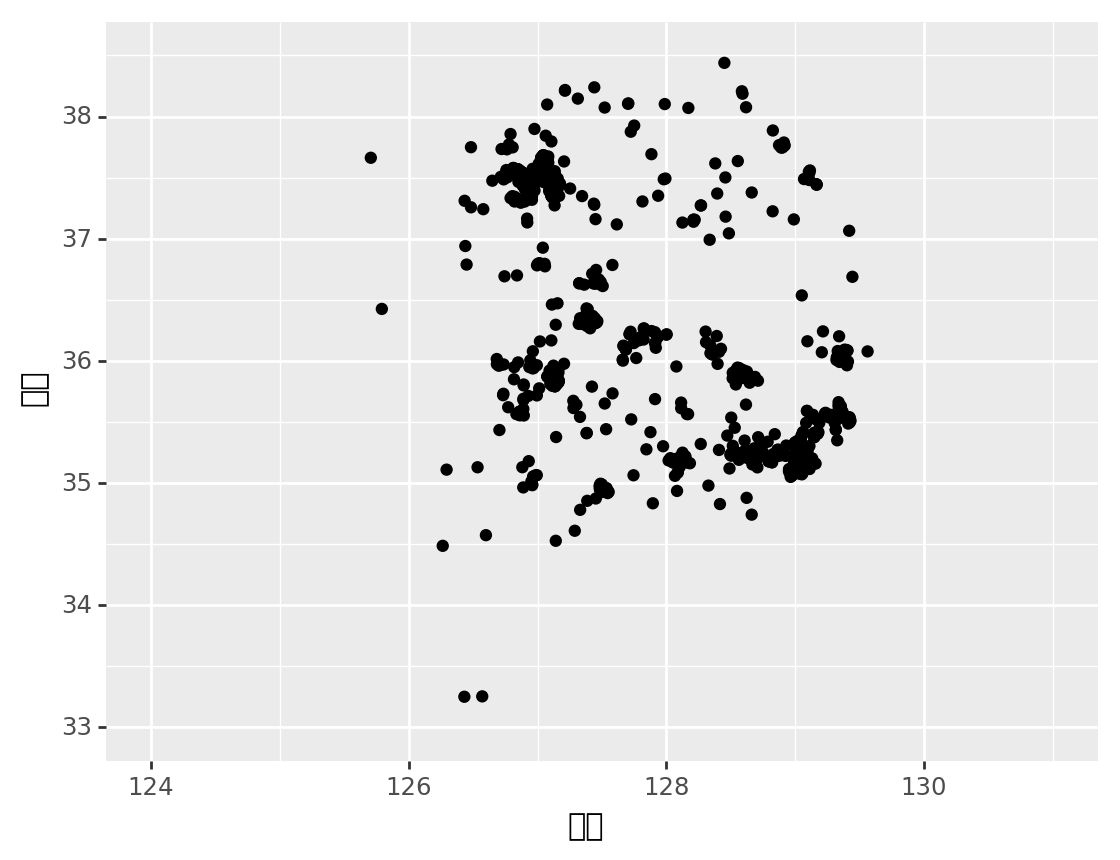

<ggplot: (-9223363244503041599)>

In [67]:
(
    ggplot(aes(x='경도', y='위도'), df) +
    geom_point() +
    xlim([124, 131]) +
    ylim([33, 38.5])
)

"도서관명"과 "지역" 분리하기.

In [0]:
df['시도'] = df['도서관명'].str.extract(r'\(([^)]+)\)$', expand=False)
df['도서관명'] = df['도서관명'].str.split('(', expand=True).iloc[:,0]
# df['도서관명'] = df['도서관명'].str.split('(', expand=True)[0]

관찰 단위(observational units)에 따라 표 두 개(도서관, 소장자료)로 분리하기.

In [92]:
libraries = df[['시도','도서관명','위도','경도','휴관일','전화번호']]
collections = df[['key','도서','연속간행물','비도서']]
libraries.head()
collections.head()

,key,도서,연속간행물,비도서
0,0,802933,530,123515
1,1,378786,117,10175
2,2,322150,195,17470
3,3,316468,24,6072
4,4,315548,916,30410


칼럼 제목에 담긴 데이터(범주형 데이터)를 변수로 만들기.

In [0]:
m_collections = collections.melt(
    id_vars='key',
    value_vars=['도서', '연속간행물', '비도서'],
    var_name='종류',
    value_name='수량'
)

In [88]:
m_collections.sort_values(by='수량',ascending=False)

,key,종류,수량
0,0,도서,802933
1,1,도서,378786
2,2,도서,322150
3,3,도서,316468
4,4,도서,315548
5,5,도서,311395
6,6,도서,311332
7,7,도서,304433
8,8,도서,303448
9,9,도서,302086


In [90]:
temp = df.loc[df['위경도'].str.len() == 20]['위경도']
temp.str.slice(0,9)
temp.str.slice(10)

0       36.309678
1       37.160015
2       35.233151
3       37.773104
4       37.467855
5       37.446635
6       35.224309
7       35.535878
8       37.410561
9       37.411601
10      36.053655
11      37.386195
13      35.808704
14      37.304552
15      35.213033
16      37.155111
17      36.788259
18      35.528204
19      37.559096
20      36.612477
21      37.361476
22      37.351545
23      35.272726
24      35.558441
25      37.396057
26      35.829133
27      37.465299
28      35.940409
29      37.286745
30      36.193769
          ...    
1141    35.153249
1142    35.558417
1143    35.568791
1144    35.146423
1145    37.438562
1146    35.089001
1147    35.568791
1148    34.989068
1149    37.413598
1150    34.964382
1151    35.931228
1152    37.467327
1153    36.316094
1154    35.251971
1155    34.982819
1156    35.308119
1157    35.079095
1158    35.891384
1159    35.612367
1160    36.339576
1161    37.443682
1162    37.351275
1163    37.457581
1164    35.123566
1165    35

휴관일은 어떻게 하면 좋을까?

In [0]:
# melting으로 해결
['월화목금공', '월화공', '']

# 데이터 다시 살펴보기

시도별 도서관 수는?

In [95]:
libraries.groupby(by='시도')['시도'].count().sort_values(ascending = False)
# libraries.value_counts()

시도
서울특별시      222
경상남도       198
경기도        165
부산광역시      104
전라북도       101
울산광역시       69
강원도         53
충청북도        52
대전광역시       50
전라남도        44
경상북도        41
대구광역시       40
충청남도        16
인천광역시       11
광주광역시        3
제주특별자치도      2
Name: 시도, dtype: int64

소장자료수(도서, 연속간행물, 비도서를 모두 합한 값)가 가장 많은 도서관은?

일요일에 쉬는 도서관은?

# 데이터 저장하기

다듬어진 데이터를 파일로 저장하기

In [0]:
# w : 쓰기 모드로 열기
with open('library.csv', 'w') as f:
 df.to_csv(f)

from google.colab import files
files.download('library.csv')